<a href="https://colab.research.google.com/github/Furkan-Coskun/DL-Deep-Learning/blob/master/DL_Assignment_2_(Image_Classification_with_CNN)_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [58]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [59]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [60]:
print("There are ", len(x_train), "images in the training dataset")     
print("There are ", len(x_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [61]:
x_train[7].shape

(28, 28)

In [62]:
x_train[7]

array([[  0,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,  63,  28,
          0,   0,   0,  33,  85,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,  28, 126, 241, 255, 255,
        255, 255, 255, 255, 252, 248, 111,   0,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0, 206, 244, 251, 241, 230, 238,
        221, 205, 230, 240, 230, 239, 251, 233, 165,   0,   0,   2,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0, 199, 251, 228, 234, 233, 236, 235,
        245, 247, 237, 234, 239, 230, 230, 235, 255, 176,   0,   0,   1,
          0,   0],
       [  0,   0,   0,   0,   0,  81, 254, 226, 228, 239, 237, 236, 234,
        232, 233, 235, 235, 236, 239, 237, 233, 225, 246,  73,   0,   0,
          0,   0],
       [  0,   0,   3,   0,   0, 255, 235, 239, 223, 234, 238, 236, 237,
        236, 235, 235, 235, 235, 236, 235, 234, 230, 231, 255,  24,   0,
          4,   0],
       [  

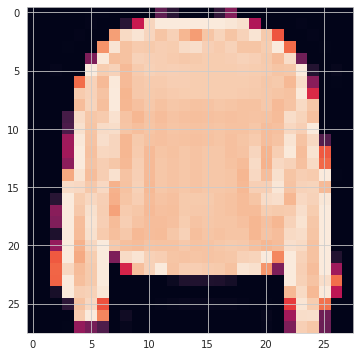

In [63]:
plt.imshow(x_train[7])


In [64]:
y_train[7]

2

In [65]:
y_train.shape

(60000,)

In [66]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [67]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [68]:
pd.Series(y_train.flatten()).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
dtype: int64

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [69]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [70]:
classes[y_train[7]]

'Pullover'

In [71]:
x_train[int(np.random.randint(low=0, high=60000, size=1))]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,
        103, 149, 147,  57,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5,   0,  22,
        224, 212, 240, 211,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   1,   5,   0,   0,   0, 100,
        229, 209, 213, 182,   0,   0,   0,   3,   2,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   2,   0,   0,   0,  40, 155, 216,
        216, 215, 211, 212, 201,  55,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0, 123, 184, 217, 218, 203,
        207, 211, 208, 203, 209, 216, 177, 111,   0,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0, 137, 230, 207, 200, 198, 200,
        196, 196, 197, 194, 195, 195, 203, 215, 162,   0,   0,   0,   0,
          0,   0],
       [  

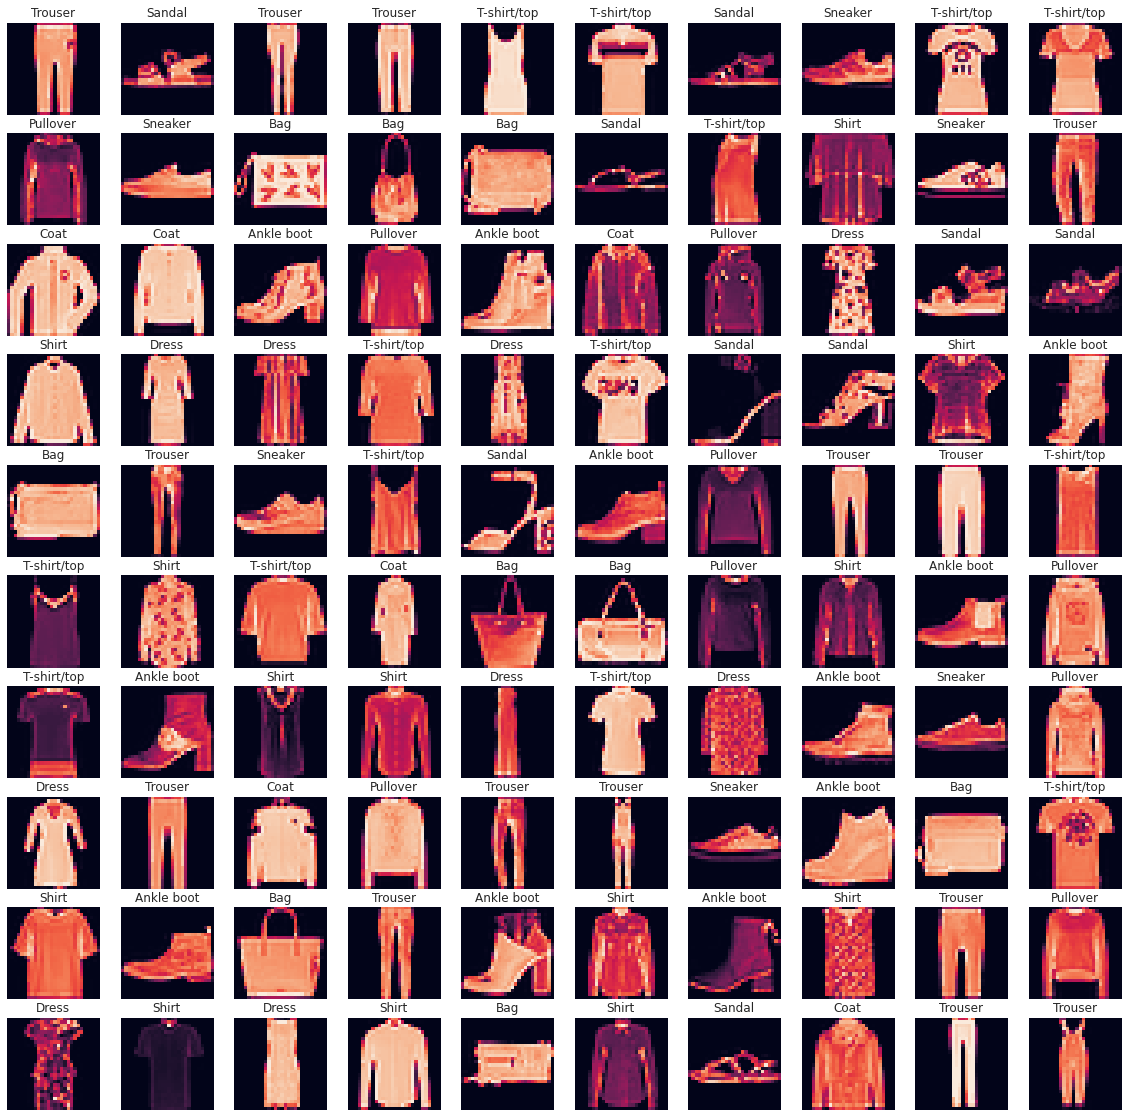

In [72]:
plt.figure(figsize=(20, 20))
for i in range(100):
    rand_index = int(np.random.randint(low=0, high=60000, size=1))
    plt.subplot(10, 10, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(x_train[rand_index])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [73]:
x_train[7].min()

0

In [74]:
x_train[7].max()

255

In [75]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [76]:
x_train[7].min()

0.0

In [77]:
x_train[7].max()

1.0

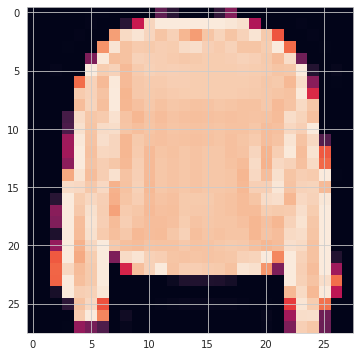

In [78]:
plt.imshow(x_train[7])

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [79]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [80]:
x_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [81]:
x_train = x_train.reshape(x_train.shape[0],28, 28, 1) 
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [82]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [83]:
from tensorflow.keras.utils import to_categorical

In [84]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [85]:
y_train[7]

2

In [86]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [87]:
Y_train[7]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [89]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2),strides=(1,1)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [90]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 27, 27, 28)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 20412)             0         
                                                                 
 dense_9 (Dense)             (None, 128)               2612864   
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                      

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [91]:
from tensorflow.keras.callbacks import EarlyStopping

In [92]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [93]:
model.fit(x_train, Y_train, batch_size=28, epochs=100, validation_data=(x_test,Y_test),callbacks=[early_stop])

Epoch 1/100
2143/2143 [==============================] - 11s 5ms/step - loss: 0.3818 - accuracy: 0.8643 - val_loss: 0.3142 - val_accuracy: 0.8884
Epoch 2/100
2143/2143 [==============================] - 10s 5ms/step - loss: 0.2538 - accuracy: 0.9098 - val_loss: 0.2823 - val_accuracy: 0.9006
Epoch 3/100
2143/2143 [==============================] - 10s 5ms/step - loss: 0.2215 - accuracy: 0.9217 - val_loss: 0.3047 - val_accuracy: 0.9050
Epoch 4/100
2143/2143 [==============================] - 10s 5ms/step - loss: 0.1979 - accuracy: 0.9318 - val_loss: 0.3128 - val_accuracy: 0.9044


In [94]:
model.metrics_names

['loss', 'accuracy']

In [95]:
summary = pd.DataFrame(model.history.history)
summary.head(7)

,loss,accuracy,val_loss,val_accuracy
0,0.382,0.864,0.314,0.888
1,0.254,0.910,0.282,0.901
2,0.221,0.922,0.305,0.905
3,0.198,0.932,0.313,0.904


**TASK 7: Plot values of metrics you used in your model.**

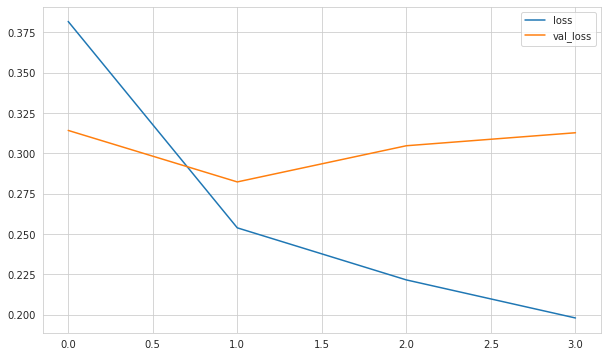

In [96]:
summary[["loss", "val_loss"]].plot();

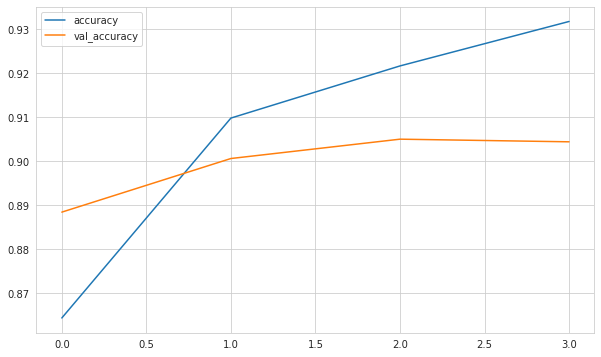

In [97]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [98]:
from sklearn.metrics import classification_report, confusion_matrix

In [99]:
model.evaluate(x_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2823 - accuracy: 0.9006


[0.28226926922798157, 0.900600016117096]

In [100]:
score = model.evaluate(x_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.28226926922798157
Test accuracy: 0.900600016117096


In [101]:
pred_prob = model.predict(x_test)
pred_prob

313/313 [==============================] - 1s 2ms/step


array([[2.6211717e-07, 1.2511304e-08, 3.1703024e-07, ..., 5.6196889e-04,
        1.5466978e-05, 9.9845719e-01],
       [1.3070021e-04, 3.7697223e-09, 9.9691170e-01, ..., 7.7152693e-09,
        3.0701617e-06, 3.8025698e-07],
       [1.8732687e-09, 1.0000000e+00, 9.0666624e-13, ..., 2.7555083e-10,
        1.5703182e-12, 1.8073125e-11],
       ...,
       [1.6144772e-09, 5.3081675e-16, 3.8963432e-09, ..., 3.3639434e-08,
        9.9999666e-01, 2.6411742e-09],
       [2.5512218e-08, 9.9998820e-01, 8.6725231e-11, ..., 1.0065356e-09,
        2.5051211e-10, 6.3448358e-10],
       [1.9060370e-03, 8.6418417e-04, 5.7669175e-03, ..., 2.2278784e-02,
        8.8538453e-03, 4.5072481e-02]], dtype=float32)

In [102]:
y_pred = np.argmax(pred_prob, axis=1)

In [103]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [104]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1000
           1       0.98      0.99      0.98      1000
           2       0.92      0.76      0.83      1000
           3       0.91      0.92      0.91      1000
           4       0.83      0.87      0.85      1000
           5       0.98      0.97      0.98      1000
           6       0.69      0.76      0.72      1000
           7       0.97      0.93      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.92      0.98      0.95      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [105]:
print(confusion_matrix(y_test, y_pred))

[[844   1   4  14   1   5 124   0   6   1]
 [  0 986   0  12   0   0   0   0   2   0]
 [ 18   1 755  11  89   0 123   0   3   0]
 [ 11  10   3 919  22   0  34   0   1   0]
 [  1   2  31  30 874   1  61   0   0   0]
 [  0   0   0   0   0 969   0   9   0  22]
 [100   6  31  24  62   0 763   0  14   0]
 [  0   0   0   0   0   8   0 932   1  59]
 [  0   1   0   5   1   1   5   3 983   1]
 [  0   0   0   0   0   3   2  14   0 981]]


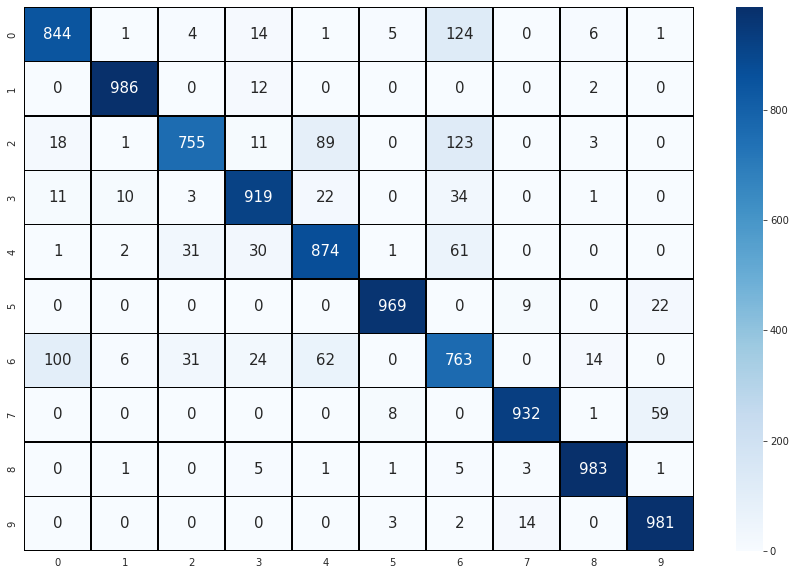

In [106]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

# Alternative Modeling 

In [107]:
from tensorflow.keras.layers import BatchNormalization
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2),strides=(1,1)))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [108]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 batch_normalization_8 (Batc  (None, 28, 28, 28)       112       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 27, 27, 28)       0         
 2D)                                                             
                                                                 
 batch_normalization_9 (Batc  (None, 27, 27, 28)       112       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 27, 27, 28)        0         
                                                      

In [109]:
model.fit(x_train, Y_train, batch_size=28, epochs=100, validation_data=(x_test,Y_test), callbacks=[early_stop])

Epoch 1/100
2143/2143 [==============================] - 16s 7ms/step - loss: 0.3623 - accuracy: 0.8721 - val_loss: 0.2850 - val_accuracy: 0.9000
Epoch 2/100
2143/2143 [==============================] - 15s 7ms/step - loss: 0.2494 - accuracy: 0.9101 - val_loss: 0.2981 - val_accuracy: 0.8901
Epoch 3/100
2143/2143 [==============================] - 15s 7ms/step - loss: 0.2093 - accuracy: 0.9257 - val_loss: 0.2754 - val_accuracy: 0.9074
Epoch 4/100
2143/2143 [==============================] - 15s 7ms/step - loss: 0.1846 - accuracy: 0.9347 - val_loss: 0.2800 - val_accuracy: 0.9078
Epoch 5/100
2143/2143 [==============================] - 15s 7ms/step - loss: 0.1611 - accuracy: 0.9426 - val_loss: 0.2718 - val_accuracy: 0.9130
Epoch 6/100
2143/2143 [==============================] - 15s 7ms/step - loss: 0.1458 - accuracy: 0.9483 - val_loss: 0.3117 - val_accuracy: 0.9086
Epoch 7/100
2143/2143 [==============================] - 15s 7ms/step - loss: 0.1292 - accuracy: 0.9541 - val_loss: 0.2781 -

In [110]:
summary = pd.DataFrame(model.history.history)
summary.tail()

,loss,accuracy,val_loss,val_accuracy
2,0.209,0.926,0.275,0.907
3,0.185,0.935,0.280,0.908
4,0.161,0.943,0.272,0.913
5,0.146,0.948,0.312,0.909
6,0.129,0.954,0.278,0.914


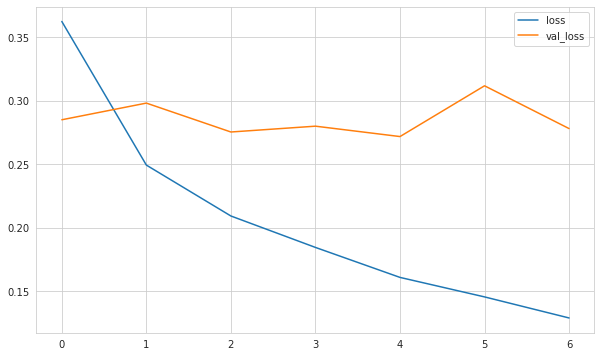

In [111]:
summary[["loss", "val_loss"]].plot();

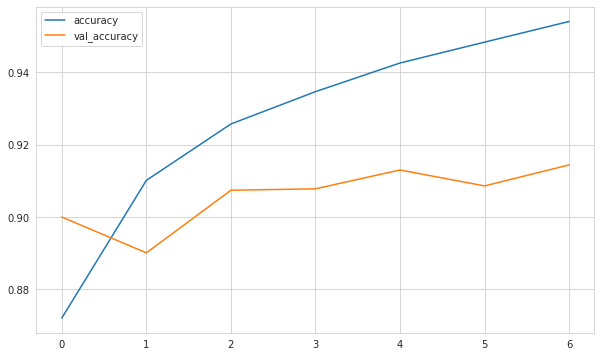

In [112]:
summary[["accuracy", "val_accuracy"]].plot();

In [114]:
model.evaluate(x_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2718 - accuracy: 0.9130


[0.27179649472236633, 0.9129999876022339]

In [116]:
score = model.evaluate(x_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.27179649472236633
Test accuracy: 0.9129999876022339


In [117]:
pred_prob = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [118]:
y_pred = np.argmax(pred_prob, axis=1)

In [119]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1000
           1       0.99      0.98      0.99      1000
           2       0.83      0.89      0.86      1000
           3       0.94      0.90      0.92      1000
           4       0.83      0.86      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.81      0.67      0.74      1000
           7       0.94      0.99      0.96      1000
           8       0.97      0.99      0.98      1000
           9       0.99      0.94      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



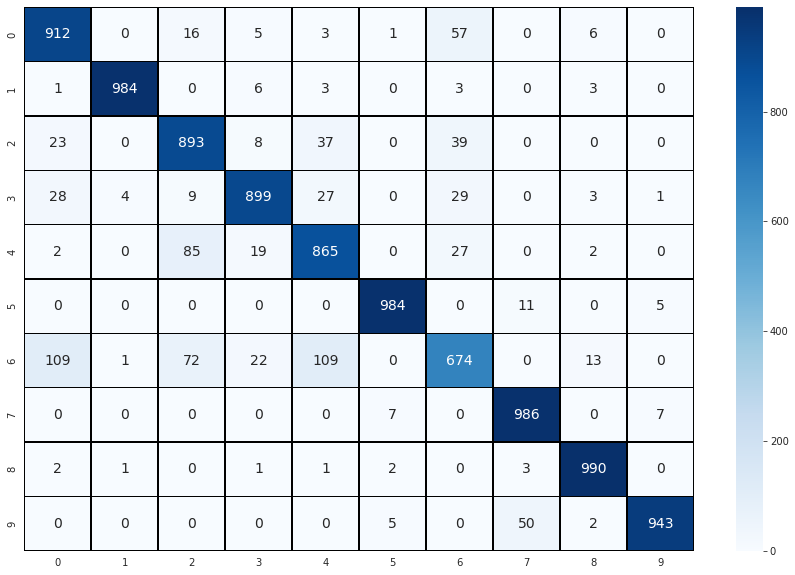

In [120]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

## Prediction

In [125]:
my_image = x_test[15]

In [126]:
my_image.shape

(28, 28, 1)

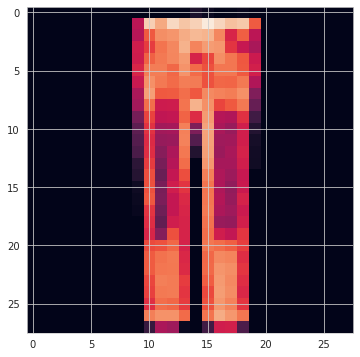

In [129]:
plt.imshow(my_image.reshape(28,28))

In [130]:
image_prediction = model.predict(my_image.reshape(1,28,28,1))

1/1 [==============================] - 0s 56ms/step


In [131]:
image_prediction

array([[5.3853182e-07, 9.9999273e-01, 1.2107661e-07, 3.0880898e-07,
        1.1025365e-06, 6.5043145e-07, 9.3915435e-07, 8.0436831e-07,
        7.0472453e-08, 2.6720209e-06]], dtype=float32)

In [132]:
np.argmax(image_prediction, axis=1)

array([1])

In [136]:
result=int(np.argmax(image_prediction, axis=1))

In [137]:
classes[result]

'Trouser'

In [138]:
model.save("cnn-fashion.h5")

In [139]:
model=tf.keras.models.load_model('cnn-fashion.h5')

In [143]:
x_test[19].shape

(28, 28, 1)

In [144]:
pred=model.predict(np.expand_dims(x_test[19],axis=0))

1/1 [==============================] - 0s 18ms/step


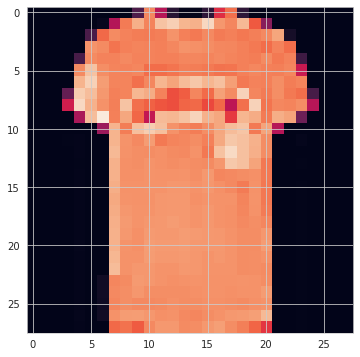

In [146]:
plt.imshow(x_test[19].reshape(28,28))

In [147]:
classes[int(np.argmax(pred, axis=1))]

'T-shirt/top'

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___